In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import luminosity_analytic as l
from utils.constants import G, kb, mp, Rb, Me, Re, Msun, RH, RHe, sigma, \
    cmperau, RHill, gammafn, mufn, Rfn, Cvfn, kdust, Tdisk, Pdisk, params, yr
from utils.parameters import FT, FSigma, mstar, Y, delad, rhoc, Mc, rc, \
    gamma, Y, a

In [9]:
delad = 2./7
a = 0.1
Mc = 10 * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            
            
prms = params(Mc, rc, a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
    Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
    Td = 1e3, kappa = 0.1)

In [15]:
t, L = l.Lglobal(prms, 1e5*yr, 1e9*yr, 500)

In [22]:
delad = 2./7
a = 0.1
Mc = np.linspace(1, 10, 10) * Me
rc = (3*Mc/(4*np.pi*rhoc))**(1./3)            

In [24]:
n = len(Mc)

In [23]:
L = np.ndarray(shape = (10, 500), dtype = float)
for i in range(len(Mc)):
                
    prms = params(Mc[i], rc[i], a, delad, Y, gamma = gammafn(delad), R = Rfn(Y), \
        Cv = Cvfn(Y, delad), Pd = Pdisk(a, mstar, FSigma, FT), \
        Td = 1e3, kappa = 0.1)
    L[i] = l.Lglobal(prms, 1e5*yr, 1e9*yr, 500)[1]
    print i

0
1
2
3
4
5
6
7
8
9


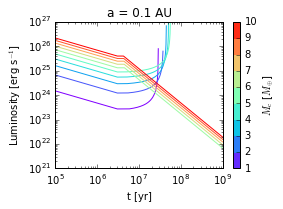

In [40]:
fig = plt.figure(figsize = (4, 3))

rnb = np.linspace(0, 256, n)
Z = [[0,0],[0,0]]
levels = Mc/Me
CS = plt.contourf(Z, levels, cmap=get_cmap(cm.rainbow))

for i in range(n):
    plt.loglog(t/yr, L[i], c = cm.rainbow(int(rnb[i])))
plt.xlim(1e5, 1e9)
plt.ylim(1e21, 1e27)

plt.xlabel('t [yr]')
plt.ylabel(r'Luminosity [erg s$^{-1}$]')
plt.title(r'a = 0.1 AU')

cbar = fig.colorbar(CS)
cbar.set_label(r'$M_{\rm c}$ [$M_{\oplus}$]')

plt.tight_layout()
plt.savefig('../figs/L_0.1_AU.pdf')